## Module-1: **Cross Validation**

![](resources/cross-validation_banner.png)<br/>
**Why needed this in model-building..??**
> To select no. of hyper-parameters _(or meta-parameters_ of a model.

![](resources/cross-validation_motivation.svg)<br/>
Polynomial regression is used as a medium to explain further discussion on this topic..

Schematically..<br/>
![](resources/schematic_representation.svg)<br/>
So, the value to be chosen is said by: **Minimum value of Validation dataset curve**.<br/>
It is actually the trade-off between the Variance and Bias which gives the minimum value.
<p style="text-align: right"> --------------------------------------------- We're going to find it out now</p>

![](resources/training_and_validation_datasets.svg)

![](resources/validation_set_approach.svg)<br/>
Fit the model in successive manner: i.e., first apply on Linear regression, the Multiple, then polynomial. .. each time get the MSE and use it for plot.<br/>
Let's see it in action with an example..

![](resources/validation_set_approach_example.svg)

These are fine.. as long as we have sufficiently large datasets.<br/>
But what if had small datasets..??<br/>
![](resources/sampling_small_datasets.png)

### **LOOCV**
![](resources/LOOCV.png)<br/>
Here `n` nearly equal to `20`..<br/>

* Leave out one sample, and perform training on remaining dataset. Say if had 10 samples, keep 1st out, do training on remaining 9, then keep 2nd out and do on remaining 9..... so on.. Find the SSE for each one. 
* At the end find the `MSE` or `Cross Validation(CV) error` for (say) Linear regression, then repeat the same procedure for Quadratic.. and plot like the above case..
![](resources/LOOCV-plot.png) <br/>(Take the reference of previous plot and understand the x-axis values.. Linear, Quadratic..)

## LOOCV-pros and cons
![](resources/LOOCV-pros&cons.png)

## k-Fold Cross Validation

Here too much similar. Instead of leaving `1`, we choose `k` such (each as a group).
![](resources/k-fold_cross_validation.png)
![](resources/k-fold_cross_validation_some_tips.png)
![](resources/k-fold_cross_validation_plot_illustration.png)

## Module-2: **Multiple Linear Regression, Model Building and Selection**

![](resources/Module-2_banner.png)
![](resources/Linear_reg_summary_recap.png)
![](resources/agenda.svg)
![](resources/read-csv().png)

In [18]:
nyc <- read.csv("resources/datasets/nyc.csv")
#nyc    # View(nyc)

In [17]:
head(nyc)   # Gives first 6 rows from dataframe

Price,Food,Decor,Service,East
43,22,18,20,0
32,20,19,19,0
34,21,13,18,0
41,20,20,17,0
54,24,19,21,0
52,22,22,21,0


In [16]:
tail(nyc)        # Gives last 6 rows from dataframe

,Price,Food,Decor,Service,East
163,31,19,16,18,0
164,31,17,15,16,0
165,26,20,16,17,0
166,31,18,16,17,0
167,38,22,17,21,0
168,34,24,10,16,0


![](resources/nyc_dataset_description.png)<br/>
Before heading to build a model, let's know the independency between the variables.. -- **pair-wise scatter plot** comes to handy and the **Correlation values**..

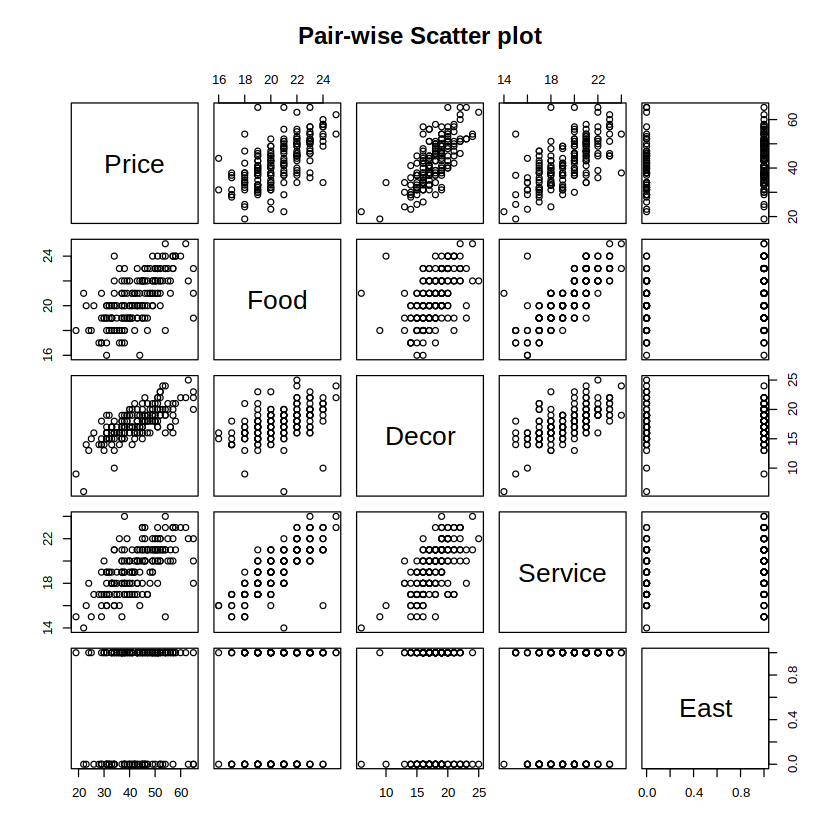

In [20]:
plot(nyc, main="Pair-wise Scatter plot")  

**Interpreting the plot.....**
* Variables are mentioned acroos the daigonals..
When one moves from Left to Right..
* The variables of left will be the Y-axis and variables above or below, becomes the X-axis.

Finding the correlation (~~ Numerical meaning of the above scatter plots..)..

In [21]:
round(cor(nyc), 4)

,Price,Food,Decor,Service,East
Price,1.0000,0.6270,0.7244,0.6411,0.1866
Food,0.6270,1.0000,0.5039,0.7945,0.1804
Decor,0.7244,0.5039,1.0000,0.6453,0.0357
Service,0.6411,0.7945,0.6453,1.0000,0.2091
East,0.1866,0.1804,0.0357,0.2091,1.0000


Food vs Service seems a good match.. close to 8

![](resources/Model_building_banner.png)<br/>
![](resources/building_multiple_linear_reg_model.png) <br/>
$\epsilon$ is the error, which is assumed as:
* It is purely in the measurement error of the dependent one(y), and not on independent one(x).
* It is an unknown quantity, which has **zero mean and some variance**.
****
![](resources/building_multiple_linear_reg_model_1.png)


In [29]:
nyc_model = lm(Price~Food+Decor+Service+East, data=nyc)   # Use this format, when need to regress on a subset of variables...
nyc_model


Call:
lm(formula = Price ~ Food + Decor + Service + East, data = nyc)

Coefficients:
(Intercept)         Food        Decor      Service         East  
 -24.023800     1.538120     1.910087    -0.002727     2.068050  


In [30]:
nyc_model_test = lm(Price~., data=nyc)                    # Use this format, when need to regress with all (excluding dependent one..)
nyc_model_test


Call:
lm(formula = Price ~ ., data = nyc)

Coefficients:
(Intercept)         Food        Decor      Service         East  
 -24.023800     1.538120     1.910087    -0.002727     2.068050  


### Model Summary

In [26]:
summary(nyc_model)


Call:
lm(formula = Price ~ Food + Decor + Service + East, data = nyc)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0465  -3.8837   0.0373   3.3942  17.7491 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.023800   4.708359  -5.102 9.24e-07 ***
Food          1.538120   0.368951   4.169 4.96e-05 ***
Decor         1.910087   0.217005   8.802 1.87e-15 ***
Service      -0.002727   0.396232  -0.007   0.9945    
East          2.068050   0.946739   2.184   0.0304 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.738 on 163 degrees of freedom
Multiple R-squared:  0.6279,	Adjusted R-squared:  0.6187 
F-statistic: 68.76 on 4 and 163 DF,  p-value: < 2.2e-16


![](resources/model_summary.png)<br/>
Service is an insignificant term (see that it has no stars -- which indicate the level of significance).<br/>
So, let's build the model by removing it..

In [28]:
nyc_model_2 = lm(Price ~ Food+Decor+East, data=nyc)
nyc_model_2


Call:
lm(formula = Price ~ Food + Decor + East, data = nyc)

Coefficients:
(Intercept)         Food        Decor         East  
    -24.027        1.536        1.909        2.067  


In [31]:
summary(nyc_model_2)


Call:
lm(formula = Price ~ Food + Decor + East, data = nyc)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0451  -3.8809   0.0389   3.3918  17.7557 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.0269     4.6727  -5.142 7.67e-07 ***
Food          1.5363     0.2632   5.838 2.76e-08 ***
Decor         1.9094     0.1900  10.049  < 2e-16 ***
East          2.0670     0.9318   2.218   0.0279 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.72 on 164 degrees of freedom
Multiple R-squared:  0.6279,	Adjusted R-squared:  0.6211 
F-statistic: 92.24 on 3 and 164 DF,  p-value: < 2.2e-16


* See that, estimates didn't changed drastically -- indicates that: Service has no that impact. And, Pr(>|t|) hasn't changed.<br/>
* Moreover, the **R-Squared value** didn'changed.. indication that, Serive is not that significant.
* But, the **Adjusted R-squared** changed slightly.
* **F-Statistic** really hight, tells that _Full model with Fod, decor and east_ performs better comparing with reduced model having only intercept.

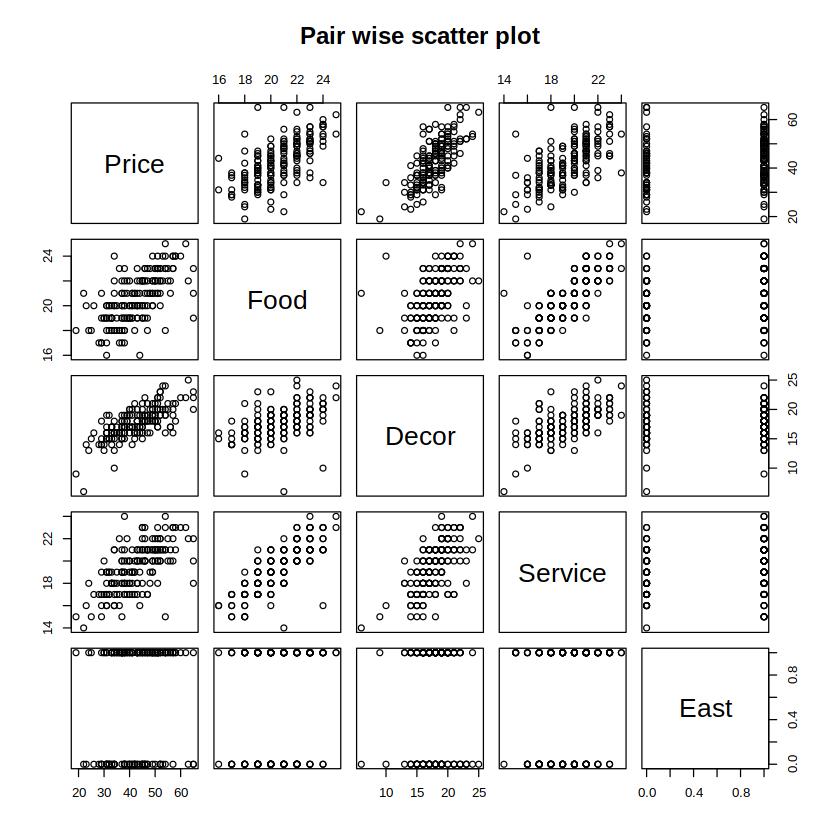

In [33]:
plot(nyc, main="Pair wise scatter plot")  # See the co-relation between Food and service.. 

As now, we built model w/o Service, let's try by removing the Food...

In [36]:
nyc_mod_3 = lm(Price~Service+Decor+East, data=nyc)
nyc_mod_3


Call:
lm(formula = Price ~ Service + Decor + East, data = nyc)

Coefficients:
(Intercept)      Service        Decor         East  
    -14.531        1.151        1.896        2.154  


In [37]:
summary(nyc_mod_3)


Call:
lm(formula = Price ~ Service + Decor + East, data = nyc)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.514  -3.668  -0.769   3.704  18.778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.5308     4.3220  -3.362 0.000963 ***
Service       1.1513     0.2973   3.872 0.000156 ***
Decor         1.8956     0.2276   8.331 3.05e-14 ***
East          2.1535     0.9927   2.169 0.031489 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.018 on 164 degrees of freedom
Multiple R-squared:  0.5882,	Adjusted R-squared:  0.5807 
F-statistic: 78.09 on 3 and 164 DF,  p-value: < 2.2e-16


Notice that, now the **R-squared** and **Adjusted R-squared** has changed drastically..<br/>
This tells that:
* **Service** is less significant than **Food**.

The scatter plot tells to use the Linear regresssion..<br/>
But we still need to verify the assumptions we make using residual analysis. -- its a task for you sir.. go ahead..

****
****
****

## Module-3: [**Logistic Regression**](https://youtu.be/H4986KDZkeI)

![](resources/Logistic_Regression_banner.png)<br/>
![](resources/Logistic_regr_intro.png)For non-linear boundary we use the **Polynomial Linear regression**.<br/>
![](resources/binary_classification.png)<br/>
![](resources/input_features.png)
![](resources/linear_classifier.png)
![](resources/why_modelling_probabilities.png) <br/>
-- to have the nuance understanding that,, not just saying "Yes" or "No", but also with some confidence, but by modelling into probabilities we won't like to lose that "Yes" and "No" fashion. -- So **how does one model this probabilities..?**

![](resources/linear_and_log_models.png)
<br/>
**Bounding only one side means....??**
> * Linear  model restricts to be in boundary of [0, 1], but that sometimes not sufficient.
> * Another chosen way is the: **Using logarithm**, this makes the -ve side trimmed off, but it makes +ve side Infinite -- but should have the notion of probability being bounded between 0 and 1.

Next comes the sigmoid function..

![](resources/sigmoid_function.png) -- this isn't properly clear, looks like some basic missing.. Come again later..
![](resources/estimation_of_parameters.png) -- little cloudy..
![](resources/log-liklihood_function.png)

## Module-3.1: [**Logistic Regression**-Continued](https://youtu.be/lIHDgiluhQ8)

### Logit Model

![](resources/logit_model.png)<br/>
Here, if the point falls on the Hyper-plane, it will have equal chance of belonging to either classes.
![](resources/logit-model_example.png)
![](resources/logit_model_example_1.png)
![](resources/logit_model_example_results.png) if `Prob < 0.5` set to `class_0` and if `>`, set to `class_1`.<br/>
And said about, why one need to partition the dataset.<br/>
![](resources/logit_model_example_solution.png)

### **Regularization**  _-- method to control overfitting.._

![](resources/regularization.png), when had `n` variables, we need .........?????.. `n+1`..<br/>
Every co-efficient has to contribute some reasonably max value, if it doesn't, removing it. -- that's the idea of regularization.<br/>
**Why one needs to do that.??**
> If doesn't it causes **Over-Fitting**.

In general, the use of regularization is:
> It helps in testing model as overfitting is cleared

## Module-4: **Performance Measures**

![](resources/performance-measures_banner.png)

![](resources/interpreting_confusion_matrix.svg)
![](resources/disecting_confusion_matrix.svg)
![](resources/measures_of_performance_1.png)
![](resources/measures_of_performance_2.svg)
![](resources/measures_of_performance_3.svg)
![](resources/measures_of_performance_4.svg) (PPV and PPN are said by sir inthe final solving slide of conf_matrix)
![](resources/measures_of_performance_5.png) `Observed accuarcy ` should be larger than the `Estimated accuracy`.
![](resources/measures_of_performance_6.png)
![](resources/final_interpreted_conf_matrix.png)

**What range of values are good..??**
> Depends on subject

## **ROC curve**

![](resources/ROC_1.svg)
![](resources/ROC_2.png)
------------------------- this is for single classifier.<br/>
But if had several classifiers..<br/>
![](resources/ROC_3.png)

* How to benchmark the results
* How to interpret the results

## Module 5: [**Logistic Regression Implementation**](https://youtu.be/y4n92JEvjtM)

![](resources/logistic_regression_implementation_banner.png)<br/>
![](resources/agenda_logistic_regr_impl.png)
![](resources/prev_lec_points.png)<br/>
![](resources/problem-stmt-banner.png)<br/>
![](resources/problem-stmt.png)

![](resources/crash_test_1.png)![](resources/crash_test_2.png)
![](resources/crash_test_parameters.png) HVAC: Heat Ventilation AC test<br/>
![](resources/crash_test_evaluation_need.png)<br/>
![](resources/crash_test_dataset_descriptions.png)

![](resources/solution-banner.png)<br/>
![](resources/getting_things_ready.png) `glm()` is the in-built function, whereas for confusion matrix, need `caret`

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


**Reading datasets...**

In [2]:
crashTest = read.csv("resources/datasets/crashtest_1.csv")
crashTest_testData = read.csv("resources/datasets/crashTest_1_TEST.csv")

In [4]:
#crashTest  # View(crashTest)

![](resources/understanding_data.png)

In [5]:
str(crashTest)

'data.frame':	80 obs. of  7 variables:
 $ CarID  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ManHI  : num  -5.27 -4.82 9.57 2.84 0 0.4 5.94 5.78 0.86 7.36 ...
 $ ManBI  : num  -1.3 -5.38 -7.5 -2.85 2.68 6.34 3.14 -1.75 -4.32 7.42 ...
 $ IntI   : num  2.86 9.72 -7.61 0.92 -4.15 0.83 -6.65 -6.85 8.1 0.27 ...
 $ HVACi  : num  -4.85 -0.97 1.33 5.51 0.85 5.03 6.62 0.73 -8.96 -8.62 ...
 $ Safety : num  4.04 -4.57 -5.1 -6.64 5.58 -8.1 -1.32 5.5 3.1 3.08 ...
 $ CarType: Factor w/ 2 levels "Hatchback","SUV": 2 1 1 1 2 2 1 1 1 2 ...


In [7]:
str(crashTest_testData)

'data.frame':	20 obs. of  7 variables:
 $ CarID  : int  81 82 83 84 85 86 87 88 89 90 ...
 $ ManHI  : num  1.94 -0.02 -0.49 5.76 2.51 -4.47 -9.89 -9.94 -8.37 8.48 ...
 $ ManBI  : num  2.21 -3.33 -4.48 1.35 -8.74 8.42 -2.25 -3.23 4.21 0.38 ...
 $ IntI   : num  3.38 0.79 5 7.92 4.53 -0.05 -5 2.81 -8.95 -3.02 ...
 $ HVACi  : num  1.78 -6.63 8.33 -0.43 -1.91 5.57 -9.23 -2.98 6.66 -1.92 ...
 $ Safety : num  -7.19 7.99 -2.77 4.29 3.95 9.62 9.38 -1.12 7.34 -7.43 ...
 $ CarType: Factor w/ 2 levels "Hatchback","SUV": 1 2 1 1 1 1 2 2 2 2 ...


![](resources/summary_syntax.png)

In [8]:
summary(crashTest)

     CarID           ManHI             ManBI              IntI        
 Min.   : 1.00   Min.   :-9.9300   Min.   :-9.9400   Min.   :-9.9900  
 1st Qu.:20.75   1st Qu.:-5.1950   1st Qu.:-5.7050   1st Qu.:-5.5725  
 Median :40.50   Median : 0.6350   Median :-1.8150   Median :-0.4150  
 Mean   :40.50   Mean   :-0.0935   Mean   :-0.9277   Mean   :-0.1349  
 3rd Qu.:60.25   3rd Qu.: 5.0500   3rd Qu.: 3.4175   3rd Qu.: 4.9775  
 Max.   :80.00   Max.   : 9.5700   Max.   : 9.6100   Max.   : 9.7200  
     HVACi             Safety             CarType  
 Min.   :-9.8200   Min.   :-9.8000   Hatchback:50  
 1st Qu.:-5.6750   1st Qu.:-4.6775   SUV      :30  
 Median : 0.8700   Median : 0.8300                 
 Mean   : 0.1197   Mean   : 0.5437                 
 3rd Qu.: 5.0625   3rd Qu.: 4.6225                 
 Max.   : 9.8900   Max.   : 9.9900                 

In [9]:
summary(crashTest_testData)

     CarID            ManHI            ManBI             IntI       
 Min.   : 81.00   Min.   :-9.940   Min.   :-8.740   Min.   :-8.950  
 1st Qu.: 85.75   1st Qu.:-5.535   1st Qu.:-2.502   1st Qu.:-3.272  
 Median : 90.50   Median : 0.740   Median : 0.670   Median : 1.200  
 Mean   : 90.50   Mean   : 0.047   Mean   : 0.328   Mean   : 0.524  
 3rd Qu.: 95.25   3rd Qu.: 5.110   3rd Qu.: 2.500   3rd Qu.: 3.908  
 Max.   :100.00   Max.   : 9.090   Max.   : 8.420   Max.   : 8.870  
     HVACi             Safety            CarType  
 Min.   :-9.2300   Min.   :-8.660   Hatchback:10  
 1st Qu.:-2.4550   1st Qu.:-6.095   SUV      :10  
 Median : 0.6750   Median :-0.770                 
 Mean   : 0.7235   Mean   : 0.191                 
 3rd Qu.: 5.3375   3rd Qu.: 4.992                 
 Max.   : 8.3300   Max.   : 9.620                 

For the numerical varible its: 5-point summary<br/>
For the categorical variable its: Frequency

![](resources/glm().png)
![](resources/building_model.png)<br/>
`P(X)` is the probability being: `HatchBack`, and `1-P(x)` is of`SUV`

In [10]:
logistic_model = glm(formula=crashTest$CarType~.,
                     family = 'binomial',
                     data=crashTest)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [11]:
logistic_model


Call:  glm(formula = crashTest$CarType ~ ., family = "binomial", data = crashTest)

Coefficients:
(Intercept)        CarID        ManHI        ManBI         IntI        HVACi  
   -22.6248       0.6066      -7.9116      23.9471     -29.0903     -37.2615  
     Safety  
   -16.3743  

Degrees of Freedom: 79 Total (i.e. Null);  73 Residual
Null Deviance:	    105.9 
Residual Deviance: 2.592e-08 	AIC: 14

![](resources/model_built_summary.png)

### **Understanding the summary**
* Probabilities are very high, none of them are significant (as > 0.5)<br/>
* **Null deviance**: deviance of model when only intercept term is taken ----------**Reduced Model**: `80-1 = 79`, `1` tells the intercept<br/>
* **Residual deviance**: deviance of model when all terms are taken into account --**Full Model**:  `80-6 = 74`<, `6` for the all varibles<br/>
* **Fisher Score**: Its used for maximum likelihood estimation and its a derivative of _**Newton Raphson Method**_. Here it took 25 iterations

In [12]:
summary(logistic_model)


Call:
glm(formula = crashTest$CarType ~ ., family = "binomial", data = crashTest)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-7.708e-05  -2.100e-08  -2.100e-08   2.100e-08   9.186e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -22.6248 14069.0777  -0.002    0.999
CarID           0.6066   509.6480   0.001    0.999
ManHI          -7.9116  4669.5451  -0.002    0.999
ManBI          23.9471  7002.6900   0.003    0.997
IntI          -29.0903  8411.3045  -0.003    0.997
HVACi         -37.2615 10222.2769  -0.004    0.997
Safety        -16.3743  4498.3291  -0.004    0.997

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.0585e+02  on 79  degrees of freedom
Residual deviance: 2.5924e-08  on 73  degrees of freedom
AIC: 14

Number of Fisher Scoring iterations: 25


![](resources/predicting_from_model.png)

In [15]:
logistic_model_train = predict(logistic_model, type='response')
#logistic_model_train

### **Plotting probabilities**

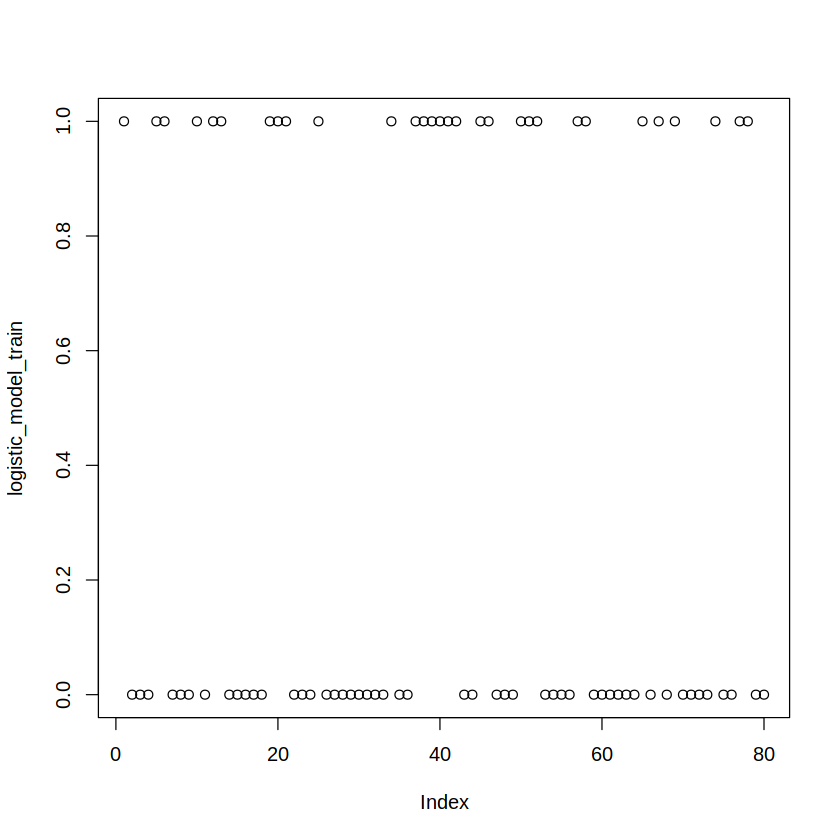

In [16]:
plot(logistic_model_train)

The classes are well-separated, but we don't know which class they belong to..

![](resources/identifying_probabilities.png) Recollect the demonstartion of usage of this function from **Week_1**..<br/>
For `Hatchback`, its really low `2.851..`, and for `SUV` its `1`. <br/>
This tells that, lower valued probabilites are associated with `Hatchback`, and higher probabilities with `SUV`.<br/>
i.e., Bottom values are of `Hatchback`, and above ones are of `SUV`.

![](resources/predicting_on_testdata.png)

In [22]:
predict_logistic = predict(logistic_model,
                           newdata = crashTest_testData,
                           type='response')
#predict_logistic

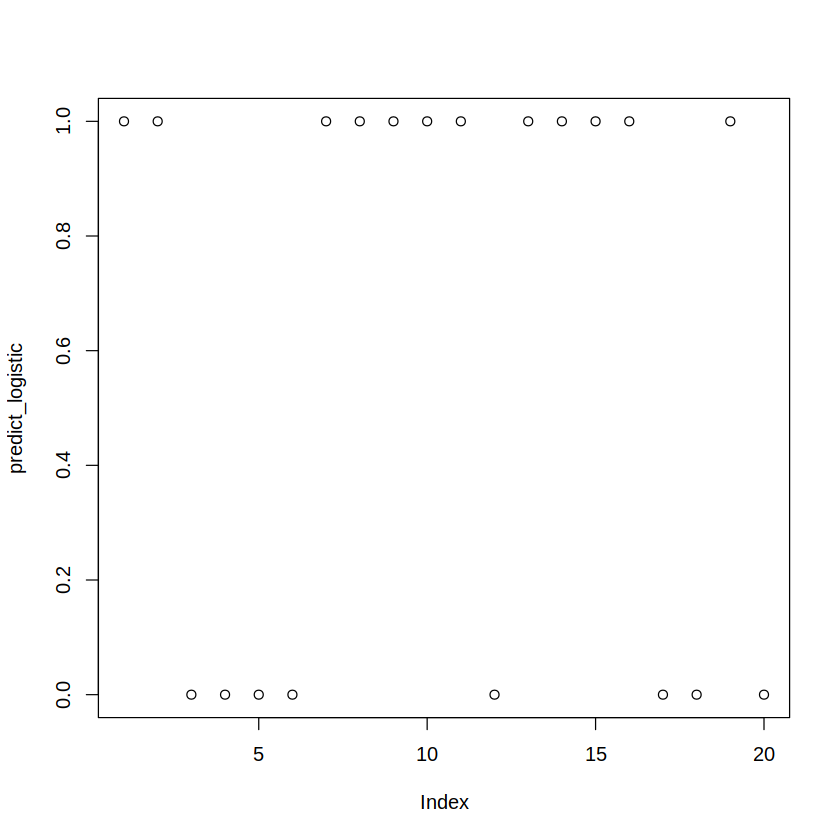

In [23]:
plot(predict_logistic)

Bottom ones are of `Hatchback` and top ones are of `SUV`.

![](resources/prediction_results.png)<br/>
**Hint:**
`dataset[condition, "new_col_name"]<-"What to assign if matched"`<br/>
**Why needed this?**
> To check, how accurately our classifier could able to predict.

![](resources/confusion_matrix.png) 
![](resources/confusion_matrix_1.png)<br/>
If not given `positive='Hatchback'`, it selects the first encountered label as the postivel label.

$$\text{Accuracy} = \frac{\text{TruePostives + TrueNegatives}}{\text{Number of observations}}$$

* The positive label (`Hatchback`) is been identified correctly, hence `Senstivity: `.
* The negative label(`SUV`), has 1 mis-classification hence ``Specificity: 0.9`
* Balanced accuracy = avg of Senstivity and Specificity.

In [24]:
help.stand(glm)

ERROR: Error in help.stand(glm): could not find function "help.stand"


In [1]:
#?glm

In [29]:
3**4

[1] 81